In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

## Read and convert data

In [2]:
df_end = pd.read_csv('BPI_Challenge_2012_end.csv')

In [3]:
# only keep the starting and end point of a case 

df_split = df_end[(df_end['Activity'] == 'A_SUBMITTED-COMPLETE') | (df_end['Activity'] == 'End-End')]
df_split['Complete Timestamp'] = pd.to_datetime(df_split['Complete Timestamp'])

## Generate train-test split

In [4]:
# finds the optimal split for given range.
# it's only a small difference, but wanted to check so we can report the discarded data in case asked

def find_split(data, interval):
    
    loss = len(data)
    
    for i in interval:
        train, test = train_test_split(data['Case ID'].unique(), test_size=(100-i)/100, shuffle=False)
        train_data = data[data['Case ID'].isin(train)]
        test_data = data[data['Case ID'].isin(test)]
        
        overlap = train_data[train_data['Complete Timestamp'] > test_data['Complete Timestamp'].min()][['Case ID']]
        
        if len(overlap) < loss:
            loss = len(overlap)
            best_train = train_data[~train_data['Case ID'].isin(overlap['Case ID'].tolist())]
            best_test = test_data
    
    
    print('Train data lost due to overlap: ' + str(len(overlap)/len(train_data)))
    return best_train, best_test

In [5]:
df_train, df_test = find_split(df_split, range(80,85))

Train data lost due to overlap: 0.03843354862185027


## Visualize split

In [6]:
split_date = df_train['Complete Timestamp'].max()
split_case = df_train['Case ID'].max()

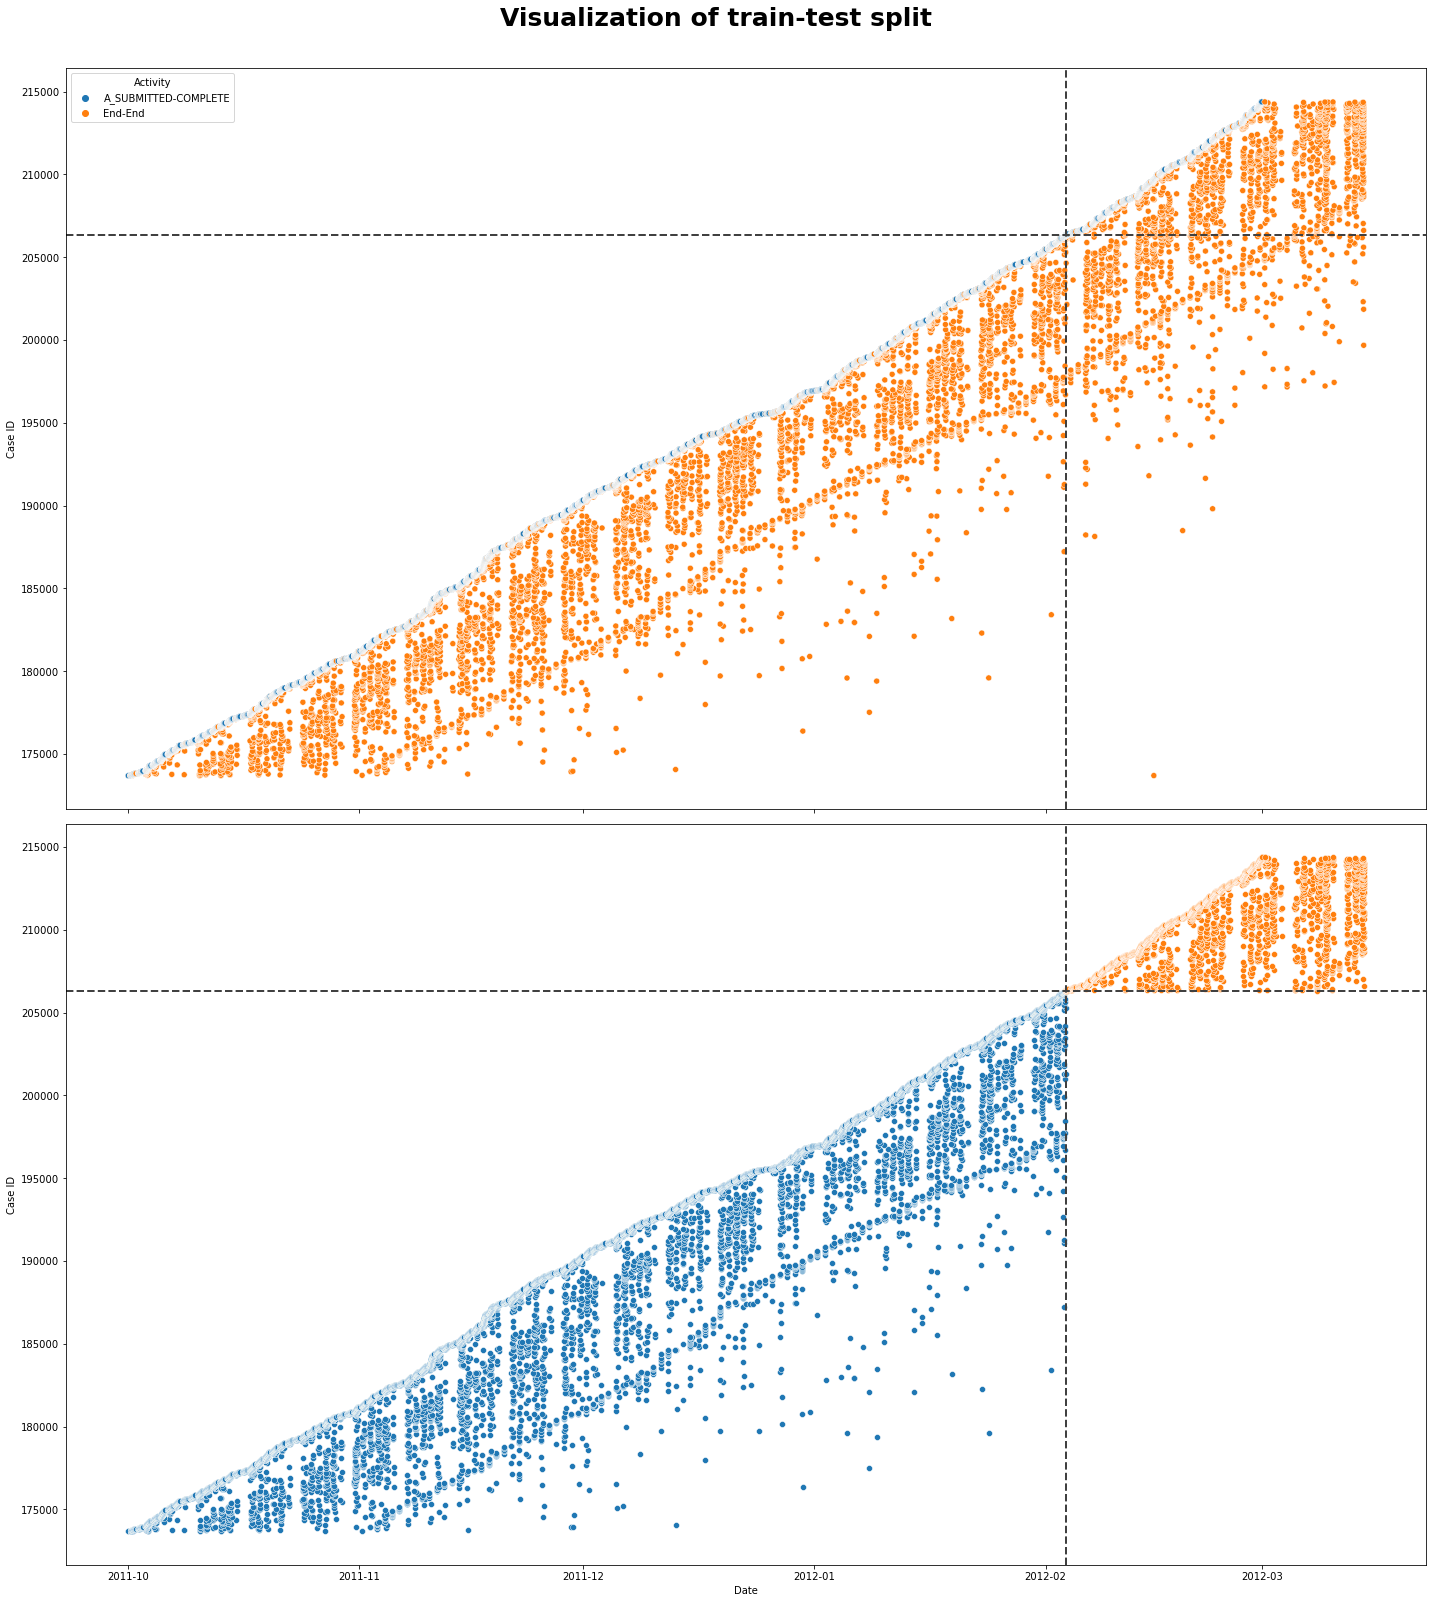

In [7]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(20, 22))

sns.scatterplot(data=df_split, x='Complete Timestamp', y='Case ID', hue='Activity', ax=ax[0])
sns.scatterplot(data=df_train, x='Complete Timestamp', y='Case ID', ax=ax[1])
sns.scatterplot(data=df_test, x='Complete Timestamp', y='Case ID', ax=ax[1])

fig.suptitle('Visualization of train-test split', size=25, weight='bold', y=1.01)
fig.tight_layout()

ax[0].set_xlabel('')
ax[0].set_ylabel('Case ID')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Case ID')

ax[0].axvline(x=split_date, color = '#404040', linestyle='--', linewidth=2)
ax[0].axhline(y=split_case, color = '#404040', linestyle='--', linewidth=2)
ax[1].axvline(x=split_date, color = '#404040', linestyle='--', linewidth=2)
ax[1].axhline(y=split_case, color = '#404040', linestyle='--', linewidth=2)

plt.show()